In [152]:
import os
os.chdir(r'D:\Uddhav\DATA SCIENCE\ML PROJECTS\LR SGD\Vehicle Performance')

import pandas as pd
pd.set_option('display.max_column',None)

import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2, chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd


from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_predict, train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [153]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [154]:
df = pd.read_csv('data.csv')
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


## Understanding the data 

In [155]:
df.tail()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024
397,1,4,119.0,82,2720,19.4,1982,chevy s-10,13.179455


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [157]:
df.describe()

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,104.250000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,5140.000000,24.800000,1982.000000,19.811697


<AxesSubplot:>

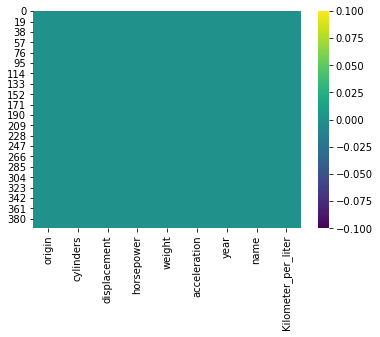

In [158]:
sns.heatmap(df.isnull(), cmap = 'viridis')

# EDA

## Target Variable : Kilometer_per_liter

In [159]:
df.Kilometer_per_liter.value_counts()

5.526868     20
5.952012     19
7.652587     17
6.377156     16
11.053736    14
6.802299     13
8.077730     12
10.628593    11
10.203449    11
9.778305     10
9.353162     10
11.904024    10
11.478880    9 
8.502874     9 
8.928018     8 
12.329168    8 
13.179455    7 
7.227443     7 
12.754311    7 
5.101724     6 
15.305173    6 
13.604599    6 
7.440015     5 
6.589727     5 
16.155461    4 
4.676581     4 
8.587903     4 
8.715446     3 
14.029742    3 
11.563909    3 
7.014871     3 
7.865159     3 
15.730317    3 
14.242314    3 
8.162759     3 
9.140590     3 
13.774656    2 
7.482529     2 
10.841165    2 
8.757960     2 
12.541739    2 
14.880030    2 
4.251437     2 
7.695101     2 
10.160935    2 
10.798650    2 
13.392027    2 
12.966883    2 
12.669282    2 
14.497400    2 
11.308823    2 
8.247788     2 
14.454886    2 
14.667458    2 
15.347688    2 
10.416021    2 
16.580605    1 
13.434541    1 
17.345863    1 
11.223794    1 
13.562084    1 
14.327343    1 
8.842989

In [160]:
df.Kilometer_per_liter.isnull().sum()

0

<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='count'>

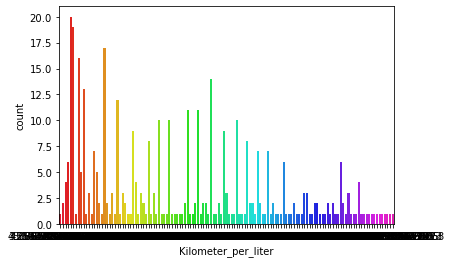

In [161]:
sns.countplot(df.Kilometer_per_liter, palette = 'gist_rainbow')

<AxesSubplot:xlabel='Kilometer_per_liter'>

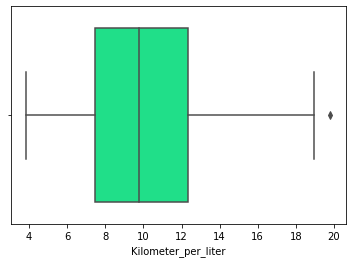

In [162]:
sns.boxplot(df.Kilometer_per_liter, palette = 'gist_rainbow')

<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='Density'>

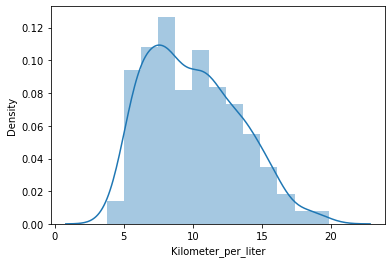

In [163]:
sns.distplot(df.Kilometer_per_liter)

#### Outlier Treatment for Kilometer_per_liter

In [164]:
Q3_k = df.Kilometer_per_liter.quantile(0.75)
Q1_k = df.Kilometer_per_liter.quantile(0.25)
IQR_k = Q3_k - Q1_k
print(Q3_k,Q1_k,IQR_k)

UL_k = Q3_k + (1.5*IQR_k)
LL_k = Q1_k - (1.5*IQR_k)

12.329167515477888 7.440014880029761 4.889152635448127


In [165]:
df.Kilometer_per_liter[(df.Kilometer_per_liter > UL_k)].value_counts().sum()

1

In [166]:
df.Kilometer_per_liter[(df.Kilometer_per_liter < LL_k)].value_counts().sum()

0

In [167]:
df[df.Kilometer_per_liter > UL_k] 

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
322,3,4,86.0,65,2110,17.9,1980,mazda glc,19.811697


In [168]:
df = df.drop([322])

In [169]:
df[df.Kilometer_per_liter > UL_k] 

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter


<AxesSubplot:xlabel='Kilometer_per_liter'>

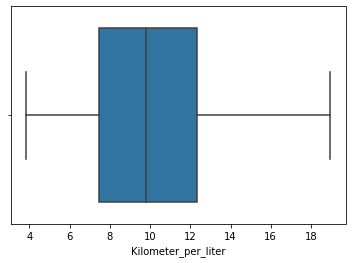

In [170]:
sns.boxplot(df.Kilometer_per_liter)

## Origin

In [171]:
df.origin.value_counts()

1    249
3    78 
2    70 
Name: origin, dtype: int64

In [172]:
df.origin.isnull().sum()

0

<AxesSubplot:xlabel='origin', ylabel='count'>

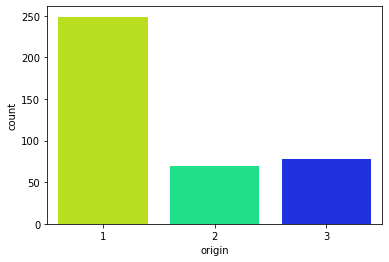

In [173]:
sns.countplot(df.origin, palette = 'gist_rainbow')

<AxesSubplot:xlabel='origin'>

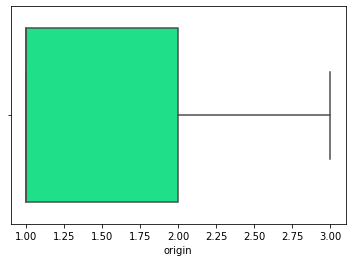

In [174]:
sns.boxplot(df.origin, palette = 'gist_rainbow')

<AxesSubplot:title={'center':'Kilometer_per_liter'}, xlabel='origin'>

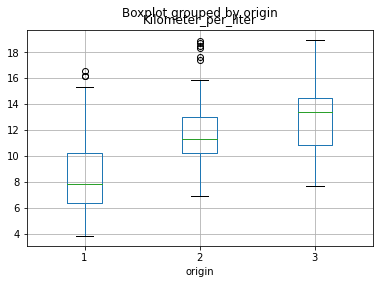

In [175]:
df.boxplot(by ='origin', column =['Kilometer_per_liter'])

In [176]:
mod = ols('Kilometer_per_liter ~ origin', data=df).fit()
aov_table = sm.stats.anova_lm(mod)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
origin,1.0,1337.591446,1337.591446,179.136235,5.975511e-34
Residual,395.0,2949.423501,7.466895,NaN,NaN


In [177]:
t_org = pairwise_tukeyhsd(df.Kilometer_per_liter, df.origin, alpha = 0.05)
print(t_org)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   3.3195  0.001  2.4594 4.1795   True
     1      3   4.3195  0.001  3.4946 5.1444   True
     2      3      1.0 0.0647 -0.0466 2.0467  False
---------------------------------------------------


In [178]:
df.origin = df.get('origin').replace(3,2)

In [179]:
df.origin.value_counts()

1    249
2    148
Name: origin, dtype: int64

In [180]:
mod = ols('Kilometer_per_liter ~ origin', data=df).fit()
aov_table = sm.stats.anova_lm(mod)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
origin,1.0,1373.421232,1373.421232,186.196649,5.276736e-35
Residual,395.0,2913.593716,7.376187,NaN,NaN


In [181]:
t_org = pairwise_tukeyhsd(df.Kilometer_per_liter, df.origin, alpha = 0.05)
print(t_org)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     1      2   3.8465 0.001 3.2923 4.4007   True
-------------------------------------------------


<AxesSubplot:title={'center':'Kilometer_per_liter'}, xlabel='origin'>

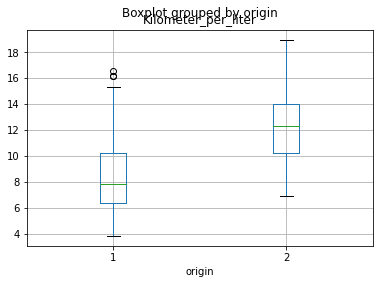

In [182]:
df.boxplot(by ='origin', column =['Kilometer_per_liter'])

#### Outliers for origin

In [183]:
Q3_o = df.origin.quantile(0.75)
Q1_o = df.origin.quantile(0.25)
IQR_o = Q3_o - Q1_o
print(Q3_o,Q1_o,IQR_o)

UL_o = Q3_o + (1.5*IQR_o)
LL_o = Q1_o - (1.5*IQR_o)


2.0 1.0 1.0


In [184]:
df.origin[(df.origin > UL_o)].value_counts().sum()

0

In [185]:
df.origin[(df.origin < LL_o)].value_counts().sum()

0

## cylinders

In [186]:
df.cylinders.value_counts()

4    203
8    103
6    84 
3    4  
5    3  
Name: cylinders, dtype: int64

In [187]:
df.cylinders.isnull().sum()

0

In [188]:
df.cylinders.describe()

count    397.000000
mean     5.458438  
std      1.701577  
min      3.000000  
25%      4.000000  
50%      4.000000  
75%      8.000000  
max      8.000000  
Name: cylinders, dtype: float64

<AxesSubplot:xlabel='cylinders', ylabel='count'>

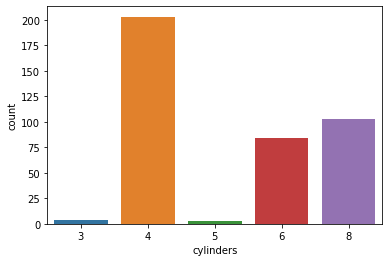

In [189]:
sns.countplot(df.cylinders)

<AxesSubplot:title={'center':'Kilometer_per_liter'}, xlabel='cylinders'>

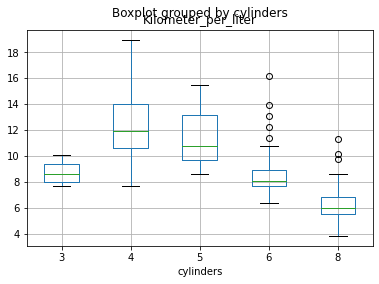

In [190]:
df.boxplot(by = 'cylinders', column = ['Kilometer_per_liter'])

<AxesSubplot:xlabel='cylinders'>

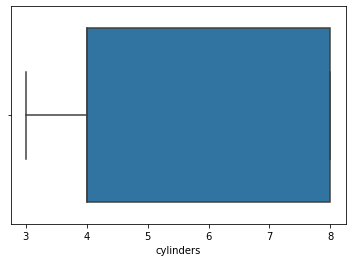

In [191]:
sns.boxplot(df.cylinders)

In [192]:
mod = ols('Kilometer_per_liter ~ cylinders', data=df).fit()
aov_table = sm.stats.anova_lm(mod)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
cylinders,1.0,2597.195216,2597.195216,607.10151,7.233448e-82
Residual,395.0,1689.819732,4.278025,NaN,NaN


In [193]:
t_cy = pairwise_tukeyhsd(df.Kilometer_per_liter, df.cylinders, alpha=0.05)
print(t_cy)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     3      4   3.6781 0.0025  0.9393  6.4169   True
     3      5   2.8981   0.31 -1.2449   7.041  False
     3      6  -0.2399    0.9 -3.0159  2.5361  False
     3      8  -2.3752 0.1299 -5.1396  0.3891  False
     4      5  -0.7801    0.9 -3.9349  2.3748  False
     4      6   -3.918  0.001 -4.6218 -3.2143   True
     4      8  -6.0534  0.001 -6.7096 -5.3971   True
     5      6   -3.138 0.0561 -6.3252  0.0493  False
     5      8  -5.2733  0.001 -8.4504 -2.0962   True
     6      8  -2.1353  0.001 -2.9328 -1.3379   True
----------------------------------------------------


In [194]:
df.cylinders = df.get('cylinders').replace(5,3)
df.cylinders = df.get('cylinders').replace(6,3)
df.cylinders = df.get('cylinders').replace(8,3)

In [195]:
df.cylinders.value_counts()

4    203
3    194
Name: cylinders, dtype: int64

<AxesSubplot:xlabel='cylinders', ylabel='count'>

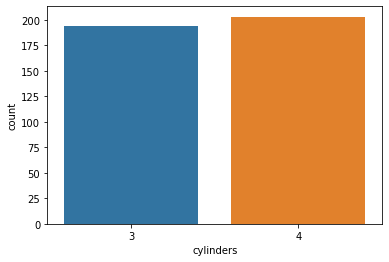

In [196]:
sns.countplot(df.cylinders)

In [197]:
mod = ols('Kilometer_per_liter ~ cylinders', data=df).fit()
aov_table = sm.stats.anova_lm(mod)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
cylinders,1.0,2478.247379,2478.247379,541.201496,5.058952e-76
Residual,395.0,1808.767569,4.579158,NaN,NaN


In [198]:
t_cy = pairwise_tukeyhsd(df.Kilometer_per_liter, df.cylinders, alpha=0.05)
print(t_cy)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     3      4   4.9983 0.001 4.5759 5.4207   True
-------------------------------------------------


<AxesSubplot:title={'center':'Kilometer_per_liter'}, xlabel='cylinders'>

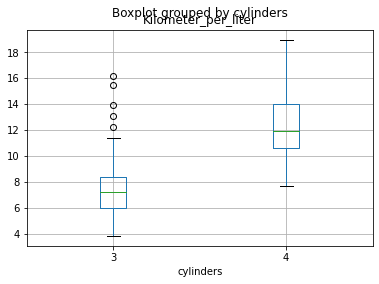

In [199]:
df.boxplot(by = 'cylinders', column = ['Kilometer_per_liter'])

### Outliers Of Cylinders

In [200]:
Q3_c = df.cylinders.quantile(0.75)
Q1_c = df.cylinders.quantile(0.25)
IQR_c = Q3_c - Q1_c
print(Q3_c,Q1_c,IQR_c)

UL_c = Q3_c + (1.5*IQR_c)
LL_c = Q1_c - (1.5*IQR_c)


4.0 3.0 1.0


In [201]:
df.cylinders[(df.cylinders > UL_c)].value_counts().sum()

0

In [202]:
df.cylinders[(df.cylinders < LL_c)].value_counts().sum()

0

## displacement

In [203]:
df.displacement.value_counts()

97.0     21
350.0    18
98.0     18
318.0    17
250.0    17
140.0    16
225.0    13
400.0    13
91.0     12
232.0    11
302.0    11
121.0    11
151.0    10
120.0    9 
90.0     8 
231.0    8 
351.0    8 
85.0     8 
200.0    8 
105.0    7 
304.0    7 
122.0    7 
79.0     6 
156.0    6 
119.0    6 
258.0    5 
107.0    5 
135.0    5 
108.0    5 
89.0     5 
116.0    4 
134.0    4 
305.0    4 
112.0    4 
360.0    4 
173.0    3 
260.0    3 
113.0    3 
198.0    3 
168.0    3 
70.0     3 
307.0    3 
455.0    3 
146.0    3 
86.0     3 
429.0    3 
262.0    2 
71.0     2 
383.0    2 
163.0    2 
440.0    2 
199.0    2 
141.0    2 
171.0    1 
76.0     1 
114.0    1 
88.0     1 
115.0    1 
130.0    1 
96.0     1 
72.0     1 
111.0    1 
81.0     1 
145.0    1 
181.0    1 
454.0    1 
183.0    1 
340.0    1 
131.0    1 
83.0     1 
110.0    1 
78.0     1 
267.0    1 
80.0     1 
144.0    1 
104.0    1 
101.0    1 
68.0     1 
390.0    1 
97.5     1 
155.0    1 
100.0    1 
Name: displaceme

In [204]:
df.displacement.value_counts().sum()

397

<AxesSubplot:xlabel='displacement', ylabel='count'>

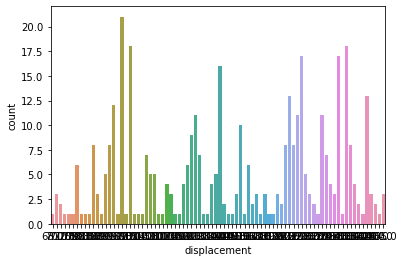

In [205]:
sns.countplot(df.displacement)

<AxesSubplot:xlabel='displacement'>

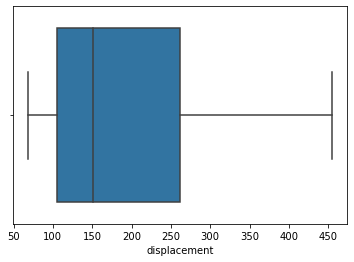

In [206]:
sns.boxplot(df.displacement)

In [207]:
df.displacement.describe()

count    397.000000
mean     193.696474
std      104.261395
min      68.000000 
25%      105.000000
50%      151.000000
75%      262.000000
max      455.000000
Name: displacement, dtype: float64

<AxesSubplot:xlabel='displacement', ylabel='Density'>

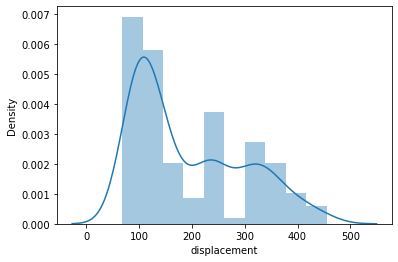

In [208]:
sns.distplot(df.displacement)

In [209]:
df['displacement'] = np.log(df['displacement'])

<AxesSubplot:xlabel='displacement', ylabel='Density'>

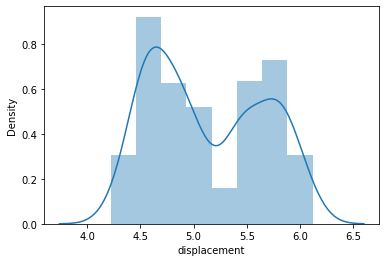

In [210]:
sns.distplot(df.displacement)

In [211]:
df.displacement.value_counts()

4.574711    21
5.857933    18
4.584967    18
5.521461    17
5.762051    17
4.941642    16
5.416100    13
5.991465    13
4.510860    12
5.710427    11
5.446737    11
4.795791    11
5.017280    10
4.787492    9 
4.442651    8 
5.298317    8 
5.442418    8 
5.860786    8 
4.499810    8 
4.653960    7 
5.717028    7 
4.804021    7 
4.779123    6 
4.369448    6 
5.049856    6 
4.682131    5 
4.488636    5 
5.552960    5 
4.672829    5 
4.905275    5 
4.897840    4 
4.718499    4 
4.753590    4 
5.886104    4 
5.720312    4 
5.123964    3 
5.726848    3 
6.120297    3 
6.061457    3 
4.248495    3 
4.727388    3 
5.560682    3 
5.153292    3 
4.454347    3 
4.983607    3 
5.288267    3 
5.093750    2 
5.293305    2 
4.948760    2 
5.948035    2 
6.086775    2 
4.262680    2 
5.568345    2 
4.477337    1 
4.394449    1 
4.644391    1 
5.141664    1 
4.969813    1 
5.587249    1 
5.209486    1 
4.219508    1 
4.736198    1 
4.875197    1 
5.966147    1 
4.564348    1 
4.709530    1 
4.418841  

In [212]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df.displacement,df.Kilometer_per_liter)
print('Pearsons correlation: %.3f' % corr)



Pearsons correlation: -0.830


#### As there is negative correlation between Displacement and Km/ltr its a bad predictor

## Horsepower

In [213]:
df.horsepower.value_counts()

150    22
90     20
88     19
110    18
100    17
75     14
95     14
70     12
67     12
105    12
97     9 
65     9 
85     9 
140    7 
145    7 
80     7 
72     6 
68     6 
84     6 
92     6 
78     6 
?      6 
71     5 
170    5 
175    5 
86     5 
180    5 
115    5 
130    5 
60     5 
52     4 
120    4 
165    4 
76     4 
83     4 
48     3 
125    3 
215    3 
190    3 
96     3 
112    3 
74     3 
63     3 
225    3 
69     3 
139    2 
160    2 
46     2 
79     2 
87     2 
198    2 
98     2 
58     2 
81     2 
155    2 
62     2 
129    2 
53     2 
153    2 
107    1 
94     1 
116    1 
64     1 
138    1 
66     1 
103    1 
122    1 
149    1 
135    1 
77     1 
142    1 
91     1 
133    1 
158    1 
230    1 
102    1 
152    1 
167    1 
193    1 
200    1 
113    1 
132    1 
61     1 
220    1 
89     1 
208    1 
54     1 
82     1 
210    1 
49     1 
108    1 
148    1 
137    1 
93     1 
Name: horsepower, dtype: int64

In [214]:
df.horsepower.value_counts().sum()

397

In [215]:
df.horsepower.isnull().sum()

0

In [216]:
df.horsepower.describe()

count     397
unique    94 
top       150
freq      22 
Name: horsepower, dtype: object

In [217]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [218]:
df.horsepower.isnull().sum()

0

In [219]:
df.horsepower = df.horsepower.replace('?','92')
df["horsepower"] = df["horsepower"].astype(str).astype(int)

<AxesSubplot:xlabel='horsepower', ylabel='count'>

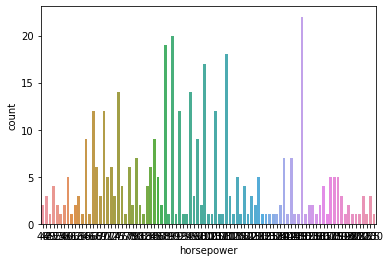

In [220]:
sns.countplot(df.horsepower)

<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='horsepower'>

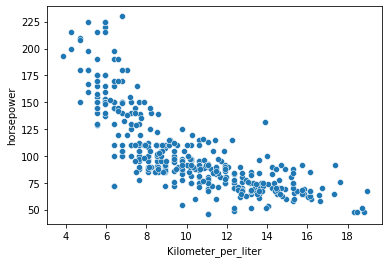

In [221]:
sns.scatterplot(df.Kilometer_per_liter,df.horsepower)

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

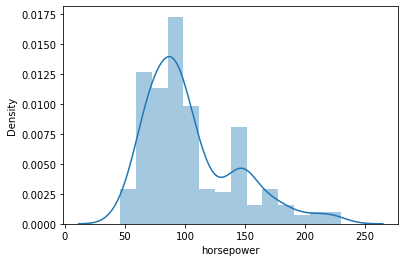

In [222]:
sns.distplot(df.horsepower)

<AxesSubplot:xlabel='horsepower'>

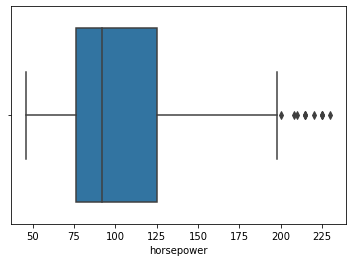

In [223]:
sns.boxplot(df.horsepower)

In [224]:
Q3_h = df.horsepower.quantile(0.75)
Q1_h = df.horsepower.quantile(0.25)
IQR_h = Q3_h - Q1_h
print(Q3_h,Q1_h,IQR_h)

UL_h = Q3_h + (1.5*IQR_h)
LL_h = Q1_h - (1.5*IQR_h)


125.0 76.0 49.0


In [225]:
df.horsepower[(df.horsepower > UL_h)].value_counts().sum()

11

In [226]:
df.horsepower[(df.horsepower < LL_h)].value_counts().sum()

0

In [227]:
df[df.horsepower > UL_h] 

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
6,1,3,6.118097,220,4354,9.0,1970,chevrolet impala,5.952012
7,1,3,6.086775,215,4312,8.5,1970,plymouth fury iii,5.952012
8,1,3,6.120297,225,4425,10.0,1970,pontiac catalina,5.952012
13,1,3,6.120297,225,3086,10.0,1970,buick estate wagon (sw),5.952012
25,1,3,5.886104,215,4615,14.0,1970,ford f250,4.251437
26,1,3,5.726848,200,4376,15.0,1970,chevy c20,4.251437
27,1,3,5.762051,210,4382,13.5,1970,dodge d200,4.676581
67,1,3,6.061457,208,4633,11.0,1972,mercury marquis,4.676581
94,1,3,6.086775,215,4735,11.0,1973,chrysler new yorker brougham,5.526868
95,1,3,6.120297,225,4951,11.0,1973,buick electra 225 custom,5.101724


In [228]:
df = df.drop([6,7,8,13,25,26,27,67,94,95,116])

In [229]:
df[df.horsepower > UL_h] 

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter


<AxesSubplot:xlabel='horsepower'>

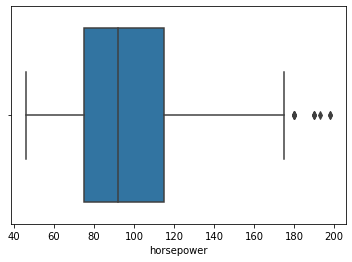

In [230]:
sns.boxplot(df.horsepower)

In [231]:
corr, _ = pearsonr(df.horsepower,df.Kilometer_per_liter)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.784


#### Negative correlation bad predictor

## Weight

In [232]:
df.weight.value_counts()

2130    4
1985    4
2125    3
2720    3
2300    3
2265    3
2155    3
2945    3
1835    2
1937    2
3425    2
3940    2
2220    2
2635    2
2395    2
4215    2
2164    2
1990    2
1950    2
1825    2
3672    2
2190    2
2065    2
1795    2
2045    2
2930    2
2670    2
1965    2
4464    2
3410    2
1800    2
1975    2
3725    2
2408    2
2542    2
2950    2
2490    1
2391    1
4952    1
2678    1
2420    1
2901    1
4096    1
4955    1
3420    1
4042    1
2910    1
2401    1
2914    1
2085    1
2405    1
3430    1
2160    1
3433    1
2605    1
3436    1
3439    1
4456    1
2385    1
3535    1
2379    1
2890    1
3190    1
4657    1
3821    1
3399    1
3365    1
4274    1
2215    1
4385    1
3360    1
2335    1
3870    1
4380    1
3880    1
2330    1
3353    1
2835    1
2833    1
1834    1
1836    1
2979    1
2625    1
2375    1
4422    1
3270    1
2372    1
3907    1
1845    1
3415    1
1867    1
2865    1
3900    1
2875    1
1850    1
3897    1
2451    1
3381    1
3892    1
3955    1


In [233]:
df.weight.isnull().sum()

0

<AxesSubplot:xlabel='weight'>

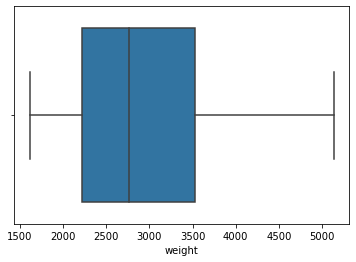

In [234]:
sns.boxplot(df.weight)

<AxesSubplot:xlabel='weight', ylabel='Density'>

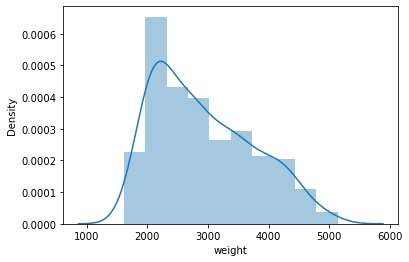

In [235]:
sns.distplot(df.weight)

<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='weight'>

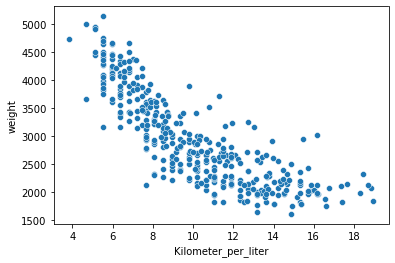

In [236]:
sns.scatterplot(df.Kilometer_per_liter,df.weight)

<AxesSubplot:xlabel='weight', ylabel='count'>

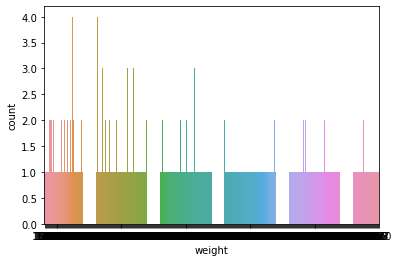

In [237]:
sns.countplot(df.weight)

In [238]:
corr, _ = pearsonr(df.weight,df.Kilometer_per_liter)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.827


#### Negative correlation bad predictor

## year

In [239]:
df.year.value_counts()

1973    37
1978    36
1976    34
1982    31
1975    30
1979    29
1981    29
1971    28
1977    28
1980    28
1972    27
1974    27
1970    22
Name: year, dtype: int64

In [240]:
df.year.isnull().sum()

0

<AxesSubplot:xlabel='year', ylabel='count'>

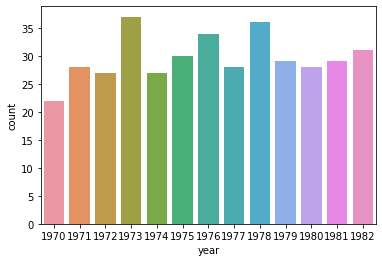

In [241]:
sns.countplot(df.year)

<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='year'>

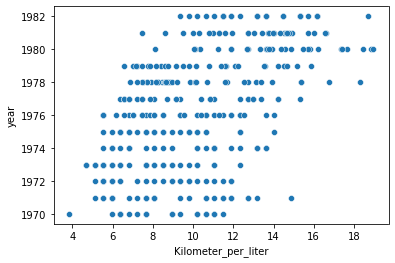

In [242]:
sns.scatterplot(df.Kilometer_per_liter,df.year)

<AxesSubplot:xlabel='year'>

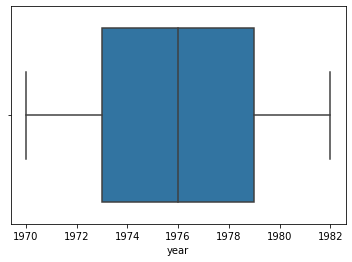

In [243]:
sns.boxplot(df.year)

<AxesSubplot:title={'center':'Kilometer_per_liter'}, xlabel='year'>

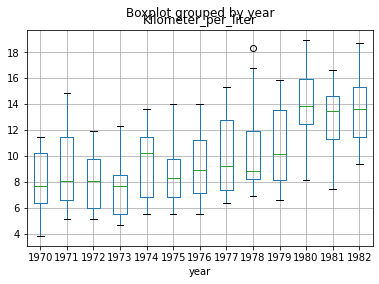

In [244]:
df.boxplot(by = 'year', column = ['Kilometer_per_liter'])

In [245]:
mod = ols('Kilometer_per_liter ~ year', data=df).fit()
aov_table = sm.stats.anova_lm(mod)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
year,1.0,1246.481359,1246.481359,171.302986,1.271221e-32
Residual,384.0,2794.165199,7.276472,NaN,NaN


In [246]:
t_year = pairwise_tukeyhsd(df.Kilometer_per_liter, df.year, alpha=0.05)
print(t_year)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  1970   1971    0.802    0.9  -1.609 3.2129  False
  1970   1972  -0.1546    0.9 -2.5851 2.2759  False
  1970   1973   -0.844    0.9 -3.1223 1.4343  False
  1970   1974     1.42 0.7368 -1.0105 3.8505  False
  1970   1975   0.3839    0.9 -1.9914 2.7592  False
  1970   1976   0.9395    0.9 -1.3759  3.255  False
  1970   1977   1.7054 0.4783 -0.7055 4.1164  False
  1970   1978   1.9971 0.1608 -0.2929 4.2871  False
  1970   1979   2.4358 0.0416  0.0433 4.8284   True
  1970   1980   5.8976  0.001  3.4867 8.3086   True
  1970   1981   4.6642  0.001  2.2716 7.0568   True
  1970   1982   5.2488  0.001  2.8898 7.6079   True
  1971   1972  -0.9566    0.9 -3.2391 1.3259  False
  1971   1973   -1.646 0.3206 -3.7657 0.4737  False
  1971   1974    0.618    0.9 -1.6645 2.9005  False
  1971   1975  -0.4181    0.9 -2.6417 1.8056  False
  1971   197

In [247]:
df.year = df.get('year').replace(1971,1970)
df.year = df.get('year').replace(1972,1970)
df.year = df.get('year').replace(1973,1970)
df.year = df.get('year').replace(1974,1970)
df.year = df.get('year').replace(1975,1970)
df.year = df.get('year').replace(1976,1970)
df.year = df.get('year').replace(1977,1970)
df.year = df.get('year').replace(1978,1970)

In [248]:
t_year2 = pairwise_tukeyhsd(df.Kilometer_per_liter, df.year, alpha=0.05)
print(t_year2)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  1970   1979   1.7351 0.0071  0.3279 3.1423   True
  1970   1980   5.1969  0.001  3.7671 6.6266   True
  1970   1981   3.9634  0.001  2.5562 5.3707   True
  1970   1982   4.5481  0.001  3.1825 5.9137   True
  1979   1980   3.4618  0.001  1.5542 5.3694   True
  1979   1981   2.2283 0.0117  0.3375 4.1192   True
  1979   1982    2.813  0.001  0.9529 4.6731   True
  1980   1981  -1.2334 0.3927 -3.1411 0.6742  False
  1980   1982  -0.6488 0.8675 -2.5259 1.2284  False
  1981   1982   0.5847    0.9 -1.2754 2.4447  False
---------------------------------------------------


In [249]:
df.year = df.get('year').replace(1981,1980)
df.year = df.get('year').replace(1982,1980)


In [250]:
t_year3 = pairwise_tukeyhsd(df.Kilometer_per_liter, df.year, alpha=0.05)
print(t_year3)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
  1970   1979   1.7351 0.0023 0.5252  2.945   True
  1970   1980   4.5619  0.001 3.8017  5.322   True
  1979   1980   2.8268  0.001 1.5013 4.1522   True
--------------------------------------------------


In [251]:
mod = ols('Kilometer_per_liter ~ year', data=df).fit()
aov_table = sm.stats.anova_lm(mod)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
year,1.0,1261.383990,1261.383990,174.280566,4.526493e-33
Residual,384.0,2779.262568,7.237663,NaN,NaN


<AxesSubplot:title={'center':'Kilometer_per_liter'}, xlabel='year'>

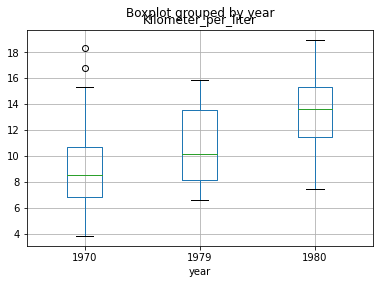

In [252]:
df.boxplot(by = 'year', column = ['Kilometer_per_liter'])

In [253]:
mod = ols('Kilometer_per_liter ~ year', data=df).fit()
aov_table = sm.stats.anova_lm(mod)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
year,1.0,1261.383990,1261.383990,174.280566,4.526493e-33
Residual,384.0,2779.262568,7.237663,NaN,NaN


## Name

In [254]:
df.name.value_counts()

ford pinto                              6
amc matador                             5
ford maverick                           5
toyota corolla                          5
chevrolet chevette                      4
amc gremlin                             4
peugeot 504                             4
toyota corona                           4
amc hornet                              4
chevrolet vega                          3
ford gran torino                        3
chevrolet citation                      3
dodge colt                              3
ford galaxie 500                        3
chevrolet impala                        3
honda civic                             3
plymouth duster                         3
chevrolet nova                          3
chevrolet caprice classic               3
volkswagen dasher                       3
datsun pl510                            2
volkswagen rabbit                       2
ford ltd                                2
pontiac phoenix                   

In [255]:
df.name.value_counts().sum()

386

<AxesSubplot:xlabel='name', ylabel='count'>

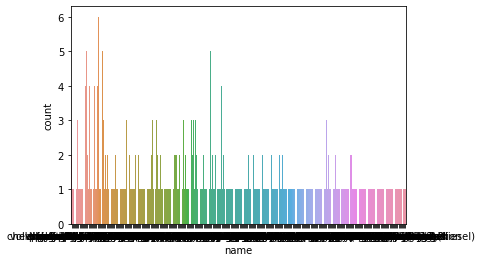

In [256]:
sns.countplot(df.name)

In [257]:
df.name.isnull().sum()

0

In [258]:
mod = ols('Kilometer_per_liter ~ name', data=df).fit()
aov_table = sm.stats.anova_lm(mod)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
name,296.0,3899.593936,13.174304,8.312593,7.356452e-24
Residual,89.0,141.052623,1.584861,NaN,NaN


### Acceleration

In [259]:
df['acceleration'].value_counts()

14.5    23
15.5    21
16.0    16
14.0    15
13.5    14
17.0    14
15.0    13
16.5    13
19.0    12
13.0    12
12.0    10
16.4    9 
12.5    8 
18.0    8 
11.5    7 
15.8    7 
14.9    7 
19.5    6 
13.2    6 
17.3    5 
14.7    5 
14.4    5 
18.5    5 
18.2    5 
21.0    5 
15.7    4 
16.2    4 
17.5    4 
18.6    4 
17.6    4 
16.9    4 
15.4    4 
11.0    4 
16.7    3 
12.8    3 
14.2    3 
19.2    3 
14.8    3 
19.4    3 
15.2    3 
15.3    3 
16.6    3 
17.7    3 
20.5    3 
12.6    2 
18.7    2 
15.9    2 
15.1    2 
13.6    2 
10.0    2 
13.4    2 
12.2    2 
12.9    2 
17.2    2 
19.6    2 
13.7    2 
20.1    2 
17.8    2 
17.4    2 
11.4    2 
22.2    2 
13.8    2 
16.8    2 
13.9    2 
14.3    2 
24.6    1 
23.5    1 
20.7    1 
23.7    1 
11.3    1 
11.1    1 
18.3    1 
15.6    1 
12.1    1 
8.5     1 
10.5    1 
8.0     1 
21.5    1 
19.9    1 
18.8    1 
18.1    1 
24.8    1 
21.8    1 
11.6    1 
21.9    1 
9.5     1 
22.1    1 
11.2    1 
20.4    1 
14.1    1 
16.1    1 

<AxesSubplot:xlabel='acceleration'>

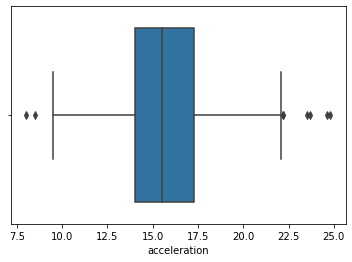

In [260]:
sns.boxplot(df.acceleration)

In [261]:
Q3=df.acceleration.quantile(0.75)
Q1=df.acceleration.quantile(0.25)
IQR=Q3-Q1
UL=Q3 + (1.5*IQR)
LL=Q1 - (1.5*IQR)

print("Q3: ",Q3)
print("Q1: ",Q1)
print("IQR: ",IQR)
print("UL: ",UL)
print("LL: ",LL)

Q3:  17.275
Q1:  14.0
IQR:  3.2749999999999986
UL:  22.187499999999996
LL:  9.087500000000002


In [262]:
df.acceleration[(df.acceleration > UL)].value_counts().sum()

6

In [263]:
df.acceleration[(df.acceleration < LL)].value_counts().sum()

2

In [264]:
df.acceleration=np.where(df.acceleration>UL,UL,df.acceleration)

In [265]:
df.acceleration=np.where(df.acceleration<LL,LL,df.acceleration)

<AxesSubplot:xlabel='acceleration'>

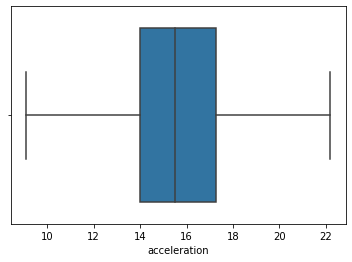

In [266]:
sns.boxplot(df.acceleration)

<AxesSubplot:xlabel='acceleration', ylabel='Density'>

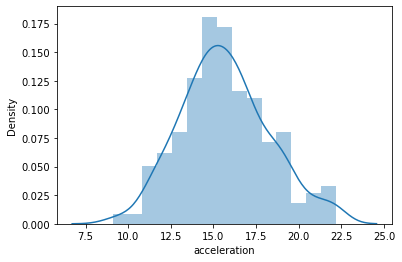

In [267]:
sns.distplot(df.acceleration)

In [268]:
corr, _ = pearsonr(df.Kilometer_per_liter,df.acceleration)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.385


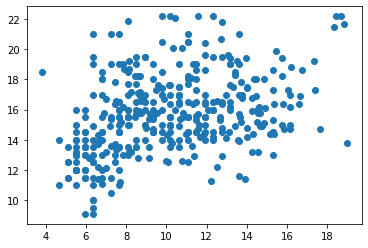

In [269]:
plt.scatter(df.Kilometer_per_liter,df.acceleration)

In [270]:
df.drop(['name'], axis = 1, inplace = True)

# Model Building

origin                 0.556061
cylinders              0.752424
displacement          -0.821473
horsepower            -0.783683
weight                -0.826527
acceleration           0.384667
year                   0.558725
Kilometer_per_liter    1.000000
Name: Kilometer_per_liter, dtype: float64

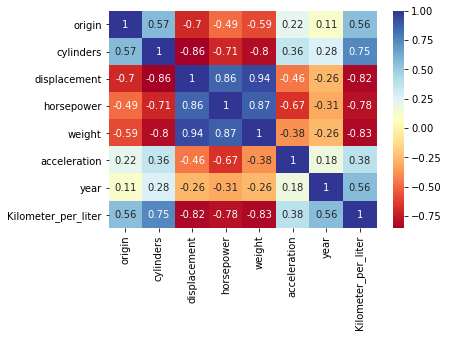

In [271]:
sns.heatmap(df.corr(),annot = True, cmap='RdYlBu')
df.corr()['Kilometer_per_liter']

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 397
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               386 non-null    int64  
 1   cylinders            386 non-null    int64  
 2   displacement         386 non-null    float64
 3   horsepower           386 non-null    int32  
 4   weight               386 non-null    int64  
 5   acceleration         386 non-null    float64
 6   year                 386 non-null    int64  
 7   Kilometer_per_liter  386 non-null    float64
dtypes: float64(3), int32(1), int64(4)
memory usage: 33.7 KB


In [273]:
x = df.iloc[:, :7]
y = df.Kilometer_per_liter

In [274]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.20, random_state=0)

In [275]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

In [276]:
xtrain.shape

(308, 7)

In [277]:
xtest.shape

(78, 7)

In [278]:
ytrain.shape

(308,)

In [279]:
ytest.shape

(78,)

# Model Using SGD

In [280]:
from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor()
sgdr.fit(xtrain,ytrain)

score = sgdr.score(xtrain, ytrain)
print('R-Square: ', score)

R-Square:  0.8402487531363099


In [281]:
y_pred = sgdr.predict(xtest)

In [282]:
mse = mean_squared_error(ytest, y_pred)
print('MSE: ', mse)
print('RMSE: ', np.sqrt(mse))

MSE:  1.967554142906131
RMSE:  1.40269531363947
